In [1]:
import numpy as np
import pandas as pd
import pegasus as pg
import json
import os
import pegasusio
from pegasusio import UnimodalData, MultimodalData
import matplotlib.pyplot as plt 
import scipy.sparse
import matplotlib.patches as mpatches
import itertools
from matplotlib import cm
import random
import scipy.io as sio
import matplotlib.cm
import glob
from matplotlib import font_manager
from utils.lists import *
from matplotlib_venn import venn2, venn2_circles

/gpfs/gibbs/pi/gerstein/ah2428/conda_envs/r2r/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# ED Fig. 8b Multiome celltype peaks

In [9]:
peaks_dir = '/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/Multiome/25_samples_archr_class_peaks/PeakDFs/'

arr = np.zeros((7,4))
for ii,celltype in enumerate(['EXC','OLI','INH','OPC','MIC','END','AST']):
    df = pd.read_csv(peaks_dir+f'{celltype}.peaks_df.csv',sep=',')
    vals = df.peakType.value_counts().values
    arr[ii] = vals

In [12]:
arr = arr/1e3
arr = pd.DataFrame(arr,index=['EXN','IN','OLG','OPC','END','AST','MG'],columns=['Intronic','Distal','Promoter','Exonic'])

In [15]:
colors = list(celltype_colors2.values())
fc_colors = []
for a in [1,0.7,0.4,0.1]:
    for c in colors:
        fc_color = (np.append(list(matplotlib.colors.to_rgb(c)),a))
        fc_colors.append(fc_color)

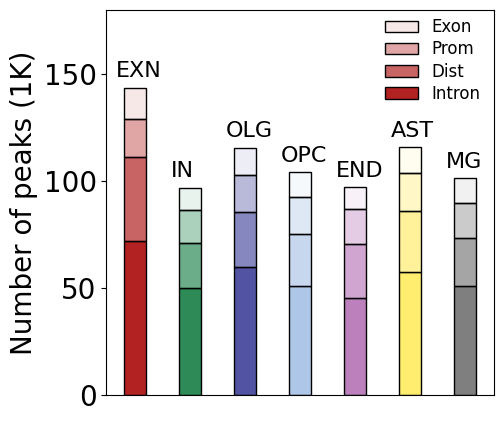

In [17]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size']= '20'
plt.rcParams.update({'hatch.color': 'white'})

fig, ax = plt.subplots(figsize=(5,5))
ax.set_ylabel('Number of peaks (1K)')
ax.set_ylim([0,180])
ax.get_xaxis().set_visible(False)

ax.bar(celltypes,arr.values[:,0],width=0.4,label='Intron',color=fc_colors[:7],ec=(0,0,0,1))
ax.bar(celltypes,arr.values[:,1],bottom=arr.values[:,0],width=0.4,label='Dist',color=fc_colors[7:14],ec=(0,0,0,1))
ax.bar(celltypes,arr.values[:,2],bottom=arr.values[:,0]+arr.values[:,1],width=0.4,label='Prom',color=fc_colors[14:21],ec=(0,0,0,1))
ax.bar(celltypes,arr.values[:,3],bottom=arr.values[:,0]+arr.values[:,1]+arr.values[:,2],width=0.4,label='Exon',color=fc_colors[21:],ec=(0,0,0,1))

handles, labels = plt.gca().get_legend_handles_labels()
order = [3,2,1,0]

for ii,c,y in zip(np.arange(7)-0.35,celltypes,arr.sum(axis=1).values+5):
    ax.text(ii,y,c,fontsize=16)
            
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=12,frameon=False,bbox_to_anchor=(0.68,0.72),labelspacing=0.25) 

# ED Fig. 8c Multiome subtype peaks

In [18]:
peaks_dir = '/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/Multiome/25_samples_archr_subclass_peaks/PeakDFs/'
subclasses=['CUX2','RORB','FEZF2','OPRK1','LAMP5','KCNG1','VIP','SST','PVALB','OLI','OPC','END','AST','MIC']
arr = np.zeros((14,4))
for ii,celltype in enumerate(subclasses):
    df = pd.read_csv(peaks_dir+f'{celltype}.peaks_df.csv',sep=',')
    vals = df.peakType.value_counts().values
    arr[ii] = vals

In [19]:
arr = arr/1e3
arr = pd.DataFrame(arr,index=subclasses,columns=['Intronic','Distal','Promoter','Exonic'])

In [20]:
colors = [celltype_colors[x] for x in subclasses]
fc_colors = []
for a in [1,0.7,0.4,0.1]:
    for c in colors:
        fc_color = (np.append(list(matplotlib.colors.to_rgb(c)),a))
        fc_colors.append(fc_color)

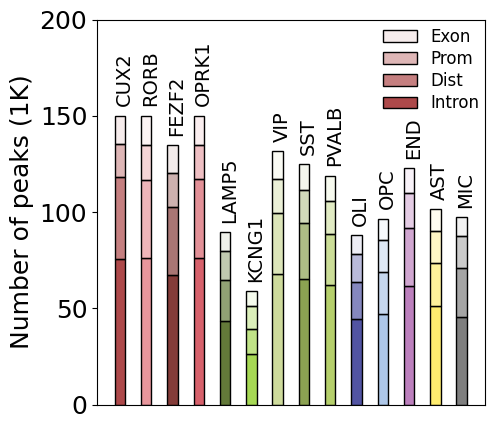

In [25]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size']= '18'

plt.rcParams.update({'hatch.color': 'white'})

fig, ax = plt.subplots(figsize=(5,5))
ax.set_ylabel('Number of peaks (1K)')
ax.set_ylim([0,200])
ax.get_xaxis().set_visible(False)

ax.bar(subclasses,arr.values[:,0],width=0.4,label='Intron',color=fc_colors[:len(subclasses)],ec=(0,0,0,1))
ax.bar(subclasses,arr.values[:,1],bottom=arr.values[:,0],width=0.4,label='Dist',color=fc_colors[len(subclasses):len(subclasses)*2],ec=(0,0,0,1))
ax.bar(subclasses,arr.values[:,2],bottom=arr.values[:,0]+arr.values[:,1],width=0.4,label='Prom',color=fc_colors[len(subclasses)*2:len(subclasses)*3],ec=(0,0,0,1))
ax.bar(subclasses,arr.values[:,3],bottom=arr.values[:,0]+arr.values[:,1]+arr.values[:,2],width=0.4,label='Exon',color=fc_colors[len(subclasses)*3:],ec=(0,0,0,1))

handles, labels = plt.gca().get_legend_handles_labels()
order = [3,2,1,0]

for ii,c,y in zip(np.arange(len(subclasses))-0.2,subclasses,arr.sum(axis=1).values+7):
    ax.text(ii,y,c,fontsize=14,rotation=90)
            
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=12,frameon=False,bbox_to_anchor=(0.7,0.72),labelspacing=0.25) 

# ED Fig. 8d Multiome celltype peaks vs bulk peaks

Text(0, 0.5, 'Overlap %')

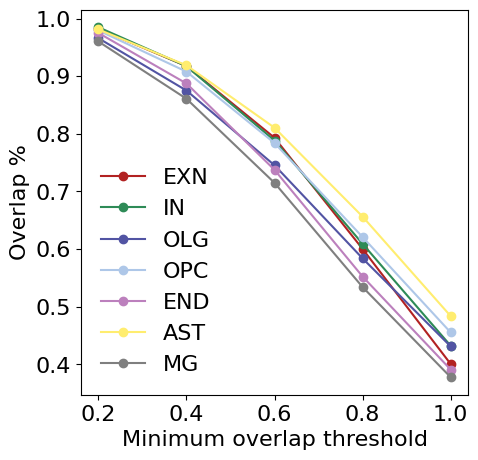

In [27]:
peaksdir = '/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/Multiome/25_samples_archr_class_peaks/bulk_overlap'
folder = '/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/Multiome/25_samples_archr_class_peaks/bulk_overlap/out'

celltypes=['EXC','INH','OLI','OPC','END','AST','MIC']
ts = [0.2, 0.4, 0.6, 0.8, 1.0] 
allratios = []

all_dfs = []
for celltype in celltypes:
    p = f'{peaksdir}/{celltype}.peaks.bed'

    n = sum([1 for i in open(p,"r").readlines() if i.strip()])
    ratios = []
    for t in ts:
        f = f'{folder}/{celltype}.{t}.peaks.bed'
        t_n = sum([1 for i in open(f,"r").readlines() if i.strip()])
        
        ratio = t_n/n
        ratios.append(ratio)
    df = pd.DataFrame({'ratio':ts,'celltype':celltype,'value':ratios})

    allratios.append(ratios)
    all_dfs.append(df)
    
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size']= '16'
fig, ax = plt.subplots(figsize=(5,5))

colors = list(celltype_colors2.values())
for ratios,cell,color in zip(allratios,['EXN','IN','OLG','OPC','END','AST','MG'],colors):
    ax.plot(ts,ratios,'-o',label=cell,color=color)
ax.set(xticks=ts,xticklabels=ts)
plt.legend(frameon=False)

plt.xlabel('Minimum overlap threshold')
plt.ylabel('Overlap %')

# ED Fig. 8e Multiome subtype peaks vs bulk peaks

Text(0, 0.5, 'Overlap %')

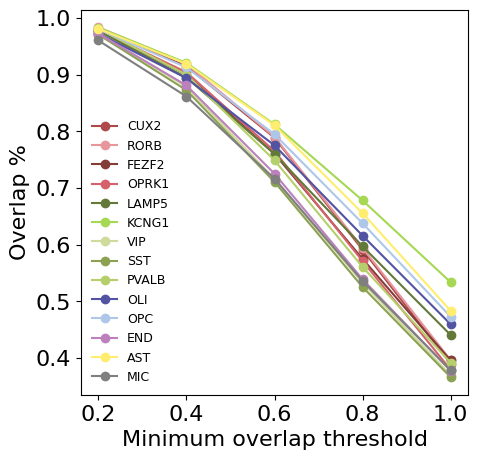

In [30]:
peaksdir = '/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/Multiome/25_samples_archr_subclass_peaks/bulk_overlap'
folder = '/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/Multiome/25_samples_archr_subclass_peaks/bulk_overlap/out'

celltypes=subclasses_old
ts = [0.2, 0.4, 0.6, 0.8, 1.0] 
allratios = []

all_dfs = []
for celltype in celltypes:
    p = f'{peaksdir}/{celltype}.peaks.bed'

    n = sum([1 for i in open(p,"r").readlines() if i.strip()])
    ratios = []
    for t in ts:
        f = f'{folder}/{celltype}.{t}.peaks.bed'
        t_n = sum([1 for i in open(f,"r").readlines() if i.strip()])
        
        ratio = t_n/n
        ratios.append(ratio)
    df = pd.DataFrame({'ratio':ts,'celltype':celltype,'value':ratios})
    allratios.append(ratios)
    all_dfs.append(df)
    
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size']= '16'
fig, ax = plt.subplots(figsize=(5,5))

colors = list(celltype_colors.values())
for ratios,cell,color in zip(allratios,subclasses,colors):
    ax.plot(ts,ratios,'-o',label=cell,color=color)
ax.set(xticks=ts,xticklabels=ts)
plt.legend(frameon=False,fontsize=9)

plt.xlabel('Minimum overlap threshold')
plt.ylabel('Overlap %')

# ED Fig. 8f Multiome celltype peaks jaccard

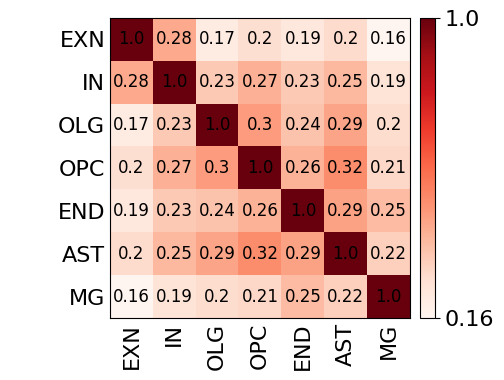

In [31]:
# jaccard similarity: intersection/union

jaccard = pd.read_csv('/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/Multiome/scripts/jaccard_multiome_class_outs.txt',header=None,sep='\t')
jac = jaccard[2].values.reshape((7,7))

fig = plt.figure(figsize=(5,5))

ax1 = fig.add_axes([0.1,0.1,0.8,0.6])

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size']= '16'

celltypes = ['EXN','IN','OLG','OPC','END','AST','MG']

ax1.axis('off')
ax1.set_xticks([])
ax1.set_yticks([])

axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
im = axmatrix.matshow(np.log(jac), aspect='auto', cmap='Reds')
axmatrix.set(xticks=np.arange(len(celltypes)),xticklabels=celltypes)
axmatrix.set_xticklabels(celltypes,rotation=90)
axmatrix.tick_params(axis="x", labelbottom=True, labeltop=False)
axmatrix.set(yticks=np.arange(len(celltypes)),yticklabels=celltypes)
axmatrix.tick_params(axis=u'both', which=u'both',length=0)

axcolor = fig.add_axes([0.92,0.1,0.03,0.6])
cbar = plt.colorbar(im, cax=axcolor)
cbar.set_ticks([np.log(jac).min(),np.log(jac).max()])
cbar.set_ticklabels([np.round(jac.min(),2),jac.max()])

for i in range(7):
    for j in range(7):
        axmatrix.text(i,j,np.round(jac[i,j],2),ha="center", va="center",fontsize=12)

# ED Fig. 8g Multiome subtype peaks jaccard

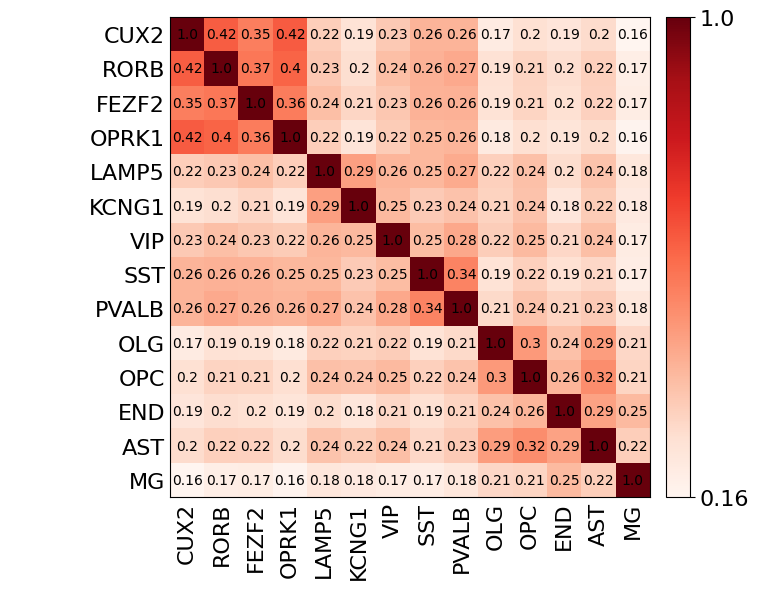

In [33]:
# jaccard similarity: intersection/union

jaccard = pd.read_csv('/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/Multiome/scripts/jaccard_multiome_subclass_outs.txt',header=None,sep='\t')
n = len(subclasses)
jac = jaccard[2].values.reshape((n,n))

fig = plt.figure(figsize=(8,8))

ax1 = fig.add_axes([0.1,0.1,0.8,0.6])

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size']= '16'

celltypes = subtypes

ax1.axis('off')
ax1.set_xticks([])
ax1.set_yticks([])

axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
im = axmatrix.matshow(np.log(jac), aspect='auto', cmap='Reds')
axmatrix.set(xticks=np.arange(len(celltypes)),xticklabels=celltypes)
axmatrix.set_xticklabels(celltypes,rotation=90)
axmatrix.tick_params(axis="x", labelbottom=True, labeltop=False)
axmatrix.set(yticks=np.arange(len(celltypes)),yticklabels=celltypes)
axmatrix.tick_params(axis=u'both', which=u'both',length=0)

axcolor = fig.add_axes([0.92,0.1,0.03,0.6])
cbar = plt.colorbar(im, cax=axcolor)
cbar.set_ticks([np.log(jac).min(),np.log(jac).max()])
cbar.set_ticklabels([np.round(jac.min(),2),jac.max()])

for i in range(n):
    for j in range(n):
        axmatrix.text(i,j,np.round(jac[i,j],2),ha="center", va="center",fontsize=10)